In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df_rot = pd.read_csv("results_rotation.csv")
ax = sns.lineplot(data=df_rot, x="rotation_param", y="tnet_acc", label="Ours")
sns.lineplot(data=df_rot,x="rotation_param", y = "pretrained_acc", label= "Source Classifier" )
sns.lineplot(data=df_rot,x="rotation_param", y = "oracle_acc", label="Oracle" )
ax.set(title="MNIST: Performance under Fixed Rotation Shift", xlabel="Rotation Parameter",  ylabel="Accuracy")
plt.legend()
plt.savefig("paper_figs/rot.pdf")

In [ ]:
df_contrast = pd.read_csv("results_contrast.csv")
ax = sns.lineplot(data=df_contrast, x="contrast_param", y="tnet_acc", label="Ours")
sns.lineplot(data=df_contrast,x="contrast_param", y = "pretrained_acc", label= "Source Classifier" )
sns.lineplot(data=df_contrast,x="contrast_param", y = "oracle_acc", label="Oracle" )
ax.set(title="CIFAR-10: Performance under Fixed Contrast Shift", xlabel="Contrast Parameter",  ylabel="Accuracy")
plt.legend()
plt.savefig("paper_figs/c.pdf")

In [ ]:
df_brightness = pd.read_csv("results_brightness.csv")
ax = sns.lineplot(data=df_brightness, x="brightness_param", y="tnet_acc", label="Ours")
sns.lineplot(data=df_brightness,x="brightness_param", y = "pretrained_acc", label="Source Classifier")
sns.lineplot(data=df_brightness,x="brightness_param", y = "oracle_acc", label="Oracle")
ax.set(title="CIFAR-10: Performance under Fixed Brightness Shift", xlabel="Brightness Param",  ylabel="Accuracy")
plt.legend()
plt.savefig("paper_figs/br.pdf")

In [ ]:
tl_br_mild = pd.read_csv("tl_br_050.csv")
small_df = df_brightness[df_brightness.brightness_param == 0.50]

for i in range(len(small_df)):
    tl_br_mild = tl_br_mild.append({"accuracy": small_df["pretrained_acc"].iloc[i], "n_examples": 0}, ignore_index=True)


column_names = ["n_examples", "accuracy"]
baseline_df = pd.DataFrame(columns = column_names)
tnet_df = pd.DataFrame(columns=column_names)

for i in set(tl_br_mild["n_examples"]):
    for j in range(len(small_df["pretrained_acc"])):
        baseline_df = baseline_df.append({"n_examples": i, "accuracy": small_df["pretrained_acc"].iloc[j]}, ignore_index=True)
        tnet_df = tnet_df.append({"n_examples": i, "accuracy": small_df["tnet_acc"].iloc[j]}, ignore_index=True)

sns.lineplot(data=tnet_df, x="n_examples", y="accuracy", label="Ours (Uses 0 Annotated Target Examples)")
sns.lineplot(data=baseline_df, x="n_examples", y="accuracy", label="Source Classifier")
ax = sns.lineplot(data=tl_br_mild, x="n_examples", y="accuracy", label="Transfer Learning")

ax.set(xlabel="Number of Annotated Target Examples", ylabel="Accuracy", title="Adapting to Mild Brightness Corruption")
plt.savefig("paper_figs/tl_br_mild.pdf")

In [ ]:
tl_br_severe = pd.read_csv("tl_br_025.csv")
small_df = df_brightness[df_brightness.brightness_param == 0.25]

for i in range(len(small_df)):
    tl_br_severe = tl_br_severe.append({"accuracy": small_df["pretrained_acc"].iloc[i], "n_examples": 0}, ignore_index=True)
    
column_names = ["n_examples", "accuracy"]
baseline_df = pd.DataFrame(columns = column_names)
tnet_df = pd.DataFrame(columns=column_names)

for i in set(tl_br_severe["n_examples"]):
    for j in range(len(small_df["pretrained_acc"])):
        baseline_df = baseline_df.append({"n_examples": i, "accuracy": small_df["pretrained_acc"].iloc[j]}, ignore_index=True)
        tnet_df = tnet_df.append({"n_examples": i, "accuracy": small_df["tnet_acc"].iloc[j]}, ignore_index=True)

sns.lineplot(data=tnet_df, x="n_examples", y="accuracy", label="Ours (Uses 0 Annotated Target Examples)")
sns.lineplot(data=baseline_df, x="n_examples", y="accuracy", label="Source Classifier")
ax = sns.lineplot(data=tl_br_severe, x="n_examples", y="accuracy", label="Transfer Learning")


ax.set(xlabel="Number of Annotated Target Examples", ylabel="Accuracy", title="Adapting to Severe Brightness Corruption")
plt.savefig("paper_figs/tl_br_severe.pdf")

In [ ]:
tl_c_mild = pd.read_csv("tl_c_050.csv")
small_df = df_contrast[df_contrast.contrast_param == 0.50]

for i in range(len(small_df)):
    tl_c_mild = tl_c_mild.append({"accuracy": small_df["pretrained_acc"].iloc[i], "n_examples": 0}, ignore_index=True)
    
column_names = ["n_examples", "accuracy"]
baseline_df = pd.DataFrame(columns = column_names)
tnet_df = pd.DataFrame(columns=column_names)

for i in set(tl_c_mild["n_examples"]):
    for j in range(len(small_df["pretrained_acc"])):
        baseline_df = baseline_df.append({"n_examples": i, "accuracy": small_df["pretrained_acc"].iloc[j]}, ignore_index=True)
        tnet_df = tnet_df.append({"n_examples": i, "accuracy": small_df["tnet_acc"].iloc[j]}, ignore_index=True)

ax = sns.lineplot(data=tnet_df, x="n_examples", y="accuracy", label="Ours (Uses 0 Annotated Target Examples)")
sns.lineplot(data=baseline_df, x="n_examples", y="accuracy", label="Source Classifier")
sns.lineplot(data=tl_c_mild, x="n_examples", y="accuracy", label="Transfer Learning")

ax.set(xlabel="Number of Annotated Target Examples", ylabel="Accuracy", title="Adapting to Mild Contrast Corruption")
plt.savefig("paper_figs/tl_c_mild.pdf")

In [ ]:
tl_c_severe = pd.read_csv("tl_c_025.csv")
small_df = df_contrast[df_contrast.contrast_param == 0.25]

for i in range(len(small_df)):
    tl_c_severe = tl_c_severe.append({"accuracy": small_df["pretrained_acc"].iloc[i], "n_examples": 0}, ignore_index=True)
    
column_names = ["n_examples", "accuracy"]
baseline_df = pd.DataFrame(columns = column_names)
tnet_df = pd.DataFrame(columns=column_names)

for i in set(tl_c_severe["n_examples"]):
    for j in range(len(small_df["pretrained_acc"])):
        baseline_df = baseline_df.append({"n_examples": i, "accuracy": small_df["pretrained_acc"].iloc[j]}, ignore_index=True)
        tnet_df = tnet_df.append({"n_examples": i, "accuracy": small_df["tnet_acc"].iloc[j]}, ignore_index=True)

sns.lineplot(data=tnet_df, x="n_examples", y="accuracy", label="Ours (Uses 0 Annotated Target Examples)")
sns.lineplot(data=baseline_df, x="n_examples", y="accuracy", label="Source Classifier")
ax = sns.lineplot(data=tl_c_severe, x="n_examples", y="accuracy", label="Transfer Learning")


ax.set(xlabel="Number of Annotated Target Examples", ylabel="Accuracy", title="Adapting to Severe Contrast Corruption")
plt.savefig("paper_figs/tl_c_severe.pdf")

In [ ]:
tl_rot_severe = pd.read_csv("tl_rot_75.csv")
tl_rot_severe
small_df = df_rot[df_rot.rotation_param == 75]

for i in range(len(small_df)):
    tl_rot_severe = tl_rot_severe.append({"accuracy": small_df["pretrained_acc"].iloc[i], "n_examples": 0}, ignore_index=True)
    
column_names = ["n_examples", "accuracy"]
baseline_df = pd.DataFrame(columns = column_names)
tnet_df = pd.DataFrame(columns=column_names)

for i in set(tl_rot_severe["n_examples"]):
    for j in range(len(small_df["pretrained_acc"])):
        baseline_df = baseline_df.append({"n_examples": i, "accuracy": small_df["pretrained_acc"].iloc[j]}, ignore_index=True)
        tnet_df = tnet_df.append({"n_examples": i, "accuracy": small_df["tnet_acc"].iloc[j]}, ignore_index=True)
        
        
sns.lineplot(data=tnet_df, x="n_examples", y="accuracy", label="Ours (Uses 0 Annotated Target Examples)")
sns.lineplot(data=baseline_df, x="n_examples", y="accuracy", label="Source Classifier")
ax = sns.lineplot(data=tl_rot_severe, x="n_examples", y="accuracy", label="Transfer Learning")


ax.set(xlabel="Number of Annotated Target Examples", ylabel="Accuracy", title="Adapting to Severe Rotation Corruption")
plt.savefig("paper_figs/tl_rot_severe.pdf")

In [ ]:
tl_rot_mild = pd.read_csv("tl_rot_30.csv")
small_df = df_rot[df_rot.rotation_param == 30]

for i in range(len(small_df)):
    tl_rot_mild = tl_rot_mild.append({"accuracy": small_df["pretrained_acc"].iloc[i], "n_examples": 0}, ignore_index=True)
    
column_names = ["n_examples", "accuracy"]
baseline_df = pd.DataFrame(columns = column_names)
tnet_df = pd.DataFrame(columns=column_names)

for i in set(tl_rot_mild["n_examples"]):
    for j in range(len(small_df["pretrained_acc"])):
        baseline_df = baseline_df.append({"n_examples": i, "accuracy": small_df["pretrained_acc"].iloc[j]}, ignore_index=True)
        tnet_df = tnet_df.append({"n_examples": i, "accuracy": small_df["tnet_acc"].iloc[j]}, ignore_index=True)

sns.lineplot(data=tnet_df, x="n_examples", y="accuracy", label="Ours (Uses 0 Annotated Target Examples)")
sns.lineplot(data=baseline_df, x="n_examples", y="accuracy", label="Source Classifier")
ax = sns.lineplot(data=tl_rot_mild, x="n_examples", y="accuracy", label="Transfer Learning")


ax.set(xlabel="Number of Annotated Target Examples", ylabel="Accuracy", title="Adapting to Mild Rotation Corruption")
plt.savefig("paper_figs/tl_rot_mild.pdf")

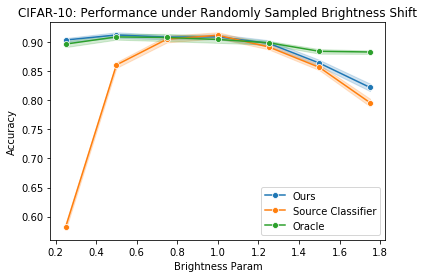

In [24]:
df_brightness = pd.read_csv("results_dist_brightness.csv")
ax = sns.lineplot(data=df_brightness, x="brightness_param", y="tnet_acc",marker='o', label="Ours")
sns.lineplot(data=df_brightness,x="brightness_param", y = "pretrained_acc", marker='o', label="Source Classifier")
sns.lineplot(data=df_brightness,x="brightness_param", y = "oracle_acc", marker='o', label="Oracle")
ax.set(title="CIFAR-10: Performance under Randomly Sampled Brightness Shift", xlabel="Brightness Param",  ylabel="Accuracy")
plt.legend()
plt.savefig("paper_figs/br_dist.pdf")

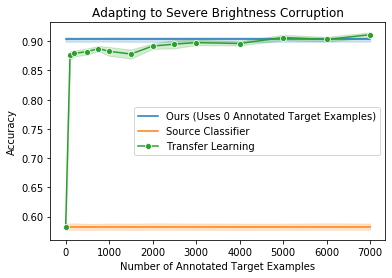

In [27]:
tl_br_severe = pd.read_csv("tl_br_025_dist.csv")
small_df = df_brightness[df_brightness.brightness_param == 0.25]

for i in range(len(small_df)):
    tl_br_severe = tl_br_severe.append({"accuracy": small_df["pretrained_acc"].iloc[i], "n_examples": 0}, ignore_index=True)
    
column_names = ["n_examples", "accuracy"]
baseline_df = pd.DataFrame(columns = column_names)
tnet_df = pd.DataFrame(columns=column_names)

for i in set(tl_br_severe["n_examples"]):
    for j in range(len(small_df["pretrained_acc"])):
        baseline_df = baseline_df.append({"n_examples": i, "accuracy": small_df["pretrained_acc"].iloc[j]}, ignore_index=True)
        tnet_df = tnet_df.append({"n_examples": i, "accuracy": small_df["tnet_acc"].iloc[j]}, ignore_index=True)

sns.lineplot(data=tnet_df, x="n_examples", y="accuracy", label="Ours (Uses 0 Annotated Target Examples)")
sns.lineplot(data=baseline_df, x="n_examples", y="accuracy", label="Source Classifier")
ax = sns.lineplot(data=tl_br_severe, x="n_examples", y="accuracy", marker='o', label="Transfer Learning")


ax.set(xlabel="Number of Annotated Target Examples", ylabel="Accuracy", title="Adapting to Severe Brightness Corruption")
plt.savefig("paper_figs/tl_dist_br_severe.pdf")

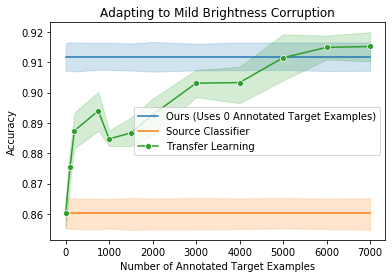

In [28]:
tl_br_mild = pd.read_csv("tl_br_050_dist.csv")
small_df = df_brightness[df_brightness.brightness_param == 0.50]

for i in range(len(small_df)):
    tl_br_mild = tl_br_mild.append({"accuracy": small_df["pretrained_acc"].iloc[i], "n_examples": 0}, ignore_index=True)


column_names = ["n_examples", "accuracy"]
baseline_df = pd.DataFrame(columns = column_names)
tnet_df = pd.DataFrame(columns=column_names)

for i in set(tl_br_mild["n_examples"]):
    for j in range(len(small_df["pretrained_acc"])):
        baseline_df = baseline_df.append({"n_examples": i, "accuracy": small_df["pretrained_acc"].iloc[j]}, ignore_index=True)
        tnet_df = tnet_df.append({"n_examples": i, "accuracy": small_df["tnet_acc"].iloc[j]}, ignore_index=True)

sns.lineplot(data=tnet_df, x="n_examples", y="accuracy", label="Ours (Uses 0 Annotated Target Examples)")
sns.lineplot(data=baseline_df, x="n_examples", y="accuracy", label="Source Classifier")
ax = sns.lineplot(data=tl_br_mild, x="n_examples", y="accuracy", marker='o', label="Transfer Learning")

ax.set(xlabel="Number of Annotated Target Examples", ylabel="Accuracy", title="Adapting to Mild Brightness Corruption")
plt.savefig("paper_figs/tl_dist_br_mild.pdf")

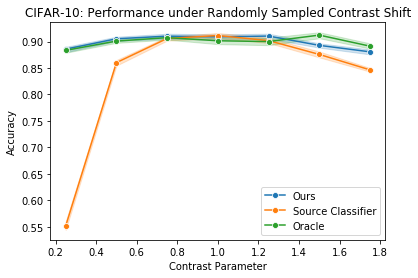

In [19]:
df_contrast = pd.read_csv("results_dist_contrast.csv")
ax = sns.lineplot(data=df_contrast, x="contrast_param", y="tnet_acc", marker='o', label="Ours")
sns.lineplot(data=df_contrast,x="contrast_param", y = "pretrained_acc", marker='o', label= "Source Classifier" )
sns.lineplot(data=df_contrast,x="contrast_param", y = "oracle_acc", marker='o', label="Oracle" )
ax.set(title="CIFAR-10: Performance under Randomly Sampled Contrast Shift", xlabel="Contrast Parameter",  ylabel="Accuracy")
plt.legend()
plt.savefig("paper_figs/c_dist.pdf")

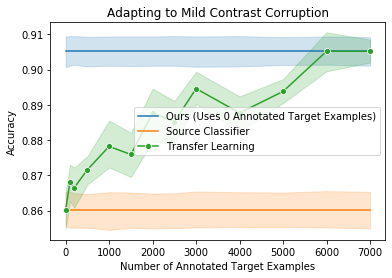

In [29]:
tl_c_mild = pd.read_csv("tl_c_050_dist.csv")
small_df = df_contrast[df_contrast.contrast_param == 0.50]

for i in range(len(small_df)):
    tl_c_mild = tl_c_mild.append({"accuracy": small_df["pretrained_acc"].iloc[i], "n_examples": 0}, ignore_index=True)
    
column_names = ["n_examples", "accuracy"]
baseline_df = pd.DataFrame(columns = column_names)
tnet_df = pd.DataFrame(columns=column_names)

for i in set(tl_c_mild["n_examples"]):
    for j in range(len(small_df["pretrained_acc"])):
        baseline_df = baseline_df.append({"n_examples": i, "accuracy": small_df["pretrained_acc"].iloc[j]}, ignore_index=True)
        tnet_df = tnet_df.append({"n_examples": i, "accuracy": small_df["tnet_acc"].iloc[j]}, ignore_index=True)

ax = sns.lineplot(data=tnet_df, x="n_examples", y="accuracy", label="Ours (Uses 0 Annotated Target Examples)")
sns.lineplot(data=baseline_df, x="n_examples", y="accuracy", label="Source Classifier")
sns.lineplot(data=tl_c_mild, x="n_examples", y="accuracy", marker='o', label="Transfer Learning")

ax.set(xlabel="Number of Annotated Target Examples", ylabel="Accuracy", title="Adapting to Mild Contrast Corruption")
plt.savefig("paper_figs/tl_dist_c_mild.pdf")

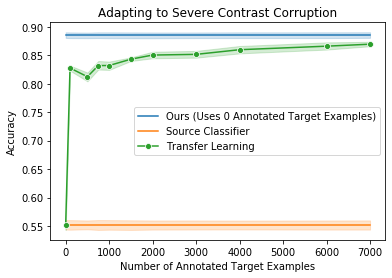

In [30]:
tl_c_severe = pd.read_csv("tl_c_025_dist.csv")
small_df = df_contrast[df_contrast.contrast_param == 0.25]

for i in range(len(small_df)):
    tl_c_severe = tl_c_severe.append({"accuracy": small_df["pretrained_acc"].iloc[i], "n_examples": 0}, ignore_index=True)
    
column_names = ["n_examples", "accuracy"]
baseline_df = pd.DataFrame(columns = column_names)
tnet_df = pd.DataFrame(columns=column_names)

for i in set(tl_c_severe["n_examples"]):
    for j in range(len(small_df["pretrained_acc"])):
        baseline_df = baseline_df.append({"n_examples": i, "accuracy": small_df["pretrained_acc"].iloc[j]}, ignore_index=True)
        tnet_df = tnet_df.append({"n_examples": i, "accuracy": small_df["tnet_acc"].iloc[j]}, ignore_index=True)

sns.lineplot(data=tnet_df, x="n_examples", y="accuracy", label="Ours (Uses 0 Annotated Target Examples)")
sns.lineplot(data=baseline_df, x="n_examples", y="accuracy", label="Source Classifier")
ax = sns.lineplot(data=tl_c_severe, x="n_examples", y="accuracy", marker='o', label="Transfer Learning")


ax.set(xlabel="Number of Annotated Target Examples", ylabel="Accuracy", title="Adapting to Severe Contrast Corruption")
plt.savefig("paper_figs/tl_dist_c_severe.pdf")

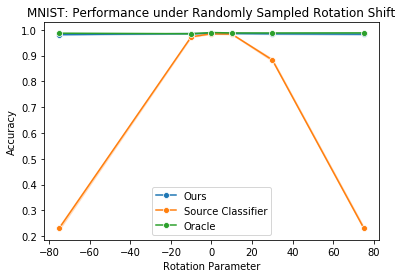

In [14]:
df_rot = pd.read_csv("results_dist_rotation.csv")
ax = sns.lineplot(data=df_rot, x="rotation_param", y="tnet_acc", marker='o', label="Ours")
sns.lineplot(data=df_rot,x="rotation_param", y = "pretrained_acc", marker='o', label= "Source Classifier" )
sns.lineplot(data=df_rot,x="rotation_param", y = "oracle_acc", marker='o', label="Oracle" )
ax.set(title="MNIST: Performance under Randomly Sampled Rotation Shift", xlabel="Rotation Parameter",  ylabel="Accuracy")
plt.legend()
plt.savefig("paper_figs/rot_dist.pdf")

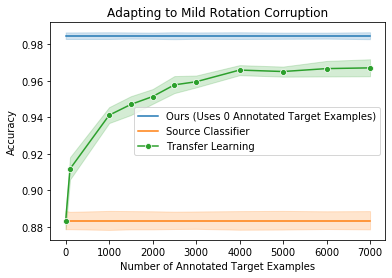

In [31]:
tl_rot_mild = pd.read_csv("tl_rot_30_dist.csv")
small_df = df_rot[df_rot.rotation_param == 30]

for i in range(len(small_df)):
    tl_rot_mild = tl_rot_mild.append({"accuracy": small_df["pretrained_acc"].iloc[i], "n_examples": 0}, ignore_index=True)
    
column_names = ["n_examples", "accuracy"]
baseline_df = pd.DataFrame(columns = column_names)
tnet_df = pd.DataFrame(columns=column_names)

for i in set(tl_rot_mild["n_examples"]):
    for j in range(len(small_df["pretrained_acc"])):
        baseline_df = baseline_df.append({"n_examples": i, "accuracy": small_df["pretrained_acc"].iloc[j]}, ignore_index=True)
        tnet_df = tnet_df.append({"n_examples": i, "accuracy": small_df["tnet_acc"].iloc[j]}, ignore_index=True)

sns.lineplot(data=tnet_df, x="n_examples", y="accuracy", label="Ours (Uses 0 Annotated Target Examples)")
sns.lineplot(data=baseline_df, x="n_examples", y="accuracy", label="Source Classifier")
ax = sns.lineplot(data=tl_rot_mild, x="n_examples", y="accuracy", marker='o', label="Transfer Learning")


ax.set(xlabel="Number of Annotated Target Examples", ylabel="Accuracy", title="Adapting to Mild Rotation Corruption")
plt.savefig("paper_figs/tl_dist_rot_mild.pdf")

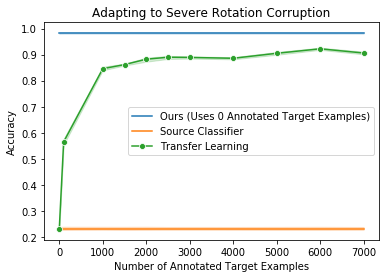

In [32]:
tl_rot_severe = pd.read_csv("tl_rot_75_dist.csv")
tl_rot_severe
small_df = df_rot[df_rot.rotation_param == 75]

for i in range(len(small_df)):
    tl_rot_severe = tl_rot_severe.append({"accuracy": small_df["pretrained_acc"].iloc[i], "n_examples": 0}, ignore_index=True)
    
column_names = ["n_examples", "accuracy"]
baseline_df = pd.DataFrame(columns = column_names)
tnet_df = pd.DataFrame(columns=column_names)

for i in set(tl_rot_severe["n_examples"]):
    for j in range(len(small_df["pretrained_acc"])):
        baseline_df = baseline_df.append({"n_examples": i, "accuracy": small_df["pretrained_acc"].iloc[j]}, ignore_index=True)
        tnet_df = tnet_df.append({"n_examples": i, "accuracy": small_df["tnet_acc"].iloc[j]}, ignore_index=True)
        
        
sns.lineplot(data=tnet_df, x="n_examples", y="accuracy", label="Ours (Uses 0 Annotated Target Examples)")
sns.lineplot(data=baseline_df, x="n_examples", y="accuracy", label="Source Classifier")
ax = sns.lineplot(data=tl_rot_severe, x="n_examples", y="accuracy", marker='o', label="Transfer Learning")


ax.set(xlabel="Number of Annotated Target Examples", ylabel="Accuracy", title="Adapting to Severe Rotation Corruption")
plt.savefig("paper_figs/tl_dist_rot_severe.pdf")

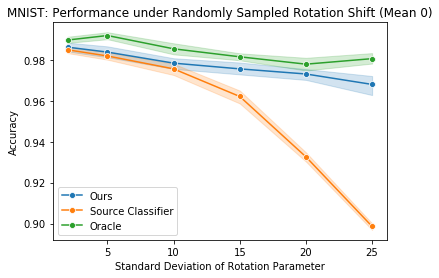

In [11]:
rot_std = pd.read_csv("results_dist_std_rotation.csv")
ax = sns.lineplot(data=rot_std, x="rotation_param_std", y="tnet_acc", marker='o', label="Ours")
sns.lineplot(data=rot_std,x="rotation_param_std", y = "pretrained_acc", marker='o', label= "Source Classifier" )
sns.lineplot(data=rot_std,x="rotation_param_std", y = "oracle_acc", marker='o', label="Oracle" )
ax.set(title="MNIST: Performance under Randomly Sampled Rotation Shift (Mean 0)", xlabel="Standard Deviation of Rotation Parameter",  ylabel="Accuracy")
plt.legend()
plt.savefig("paper_figs/rot_std_0.pdf")